# **ABOUT THE DATASET**


#### Context:

Credit card companies need to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

#### Content:

- **Dataset**: Transactions made by European cardholders in September 2013.
- **Duration**: Two days, with 492 frauds out of 284,807 transactions.
- **Class Imbalance**: Fraudulent transactions (positive class) account for 0.172% of all transactions.
- **Features**:

  - Numerical input variables resulting from PCA transformation.
  - 'Time': Seconds elapsed between each transaction and the first transaction.
  - 'Amount': Transaction amount, suitable for cost-sensitive learning.

- **Target**:
  - 'Class': Response variable, 1 for fraud, 0 otherwise.

#### Source:

- The dataset has been collected and analyzed by Worldline and the Machine Learning Group (MLG) of Université Libre de Bruxelles (ULB) as part of a research collaboration on big data mining and fraud detection.
- More details on the current and past projects related to fraud detection are available on the [MLG website](http://mlg.ulb.ac.be) and [ResearchGate](https://www.researchgate.net/project/Fraud-detection-5).


#### Introduction

Digital transactions are becoming the norm. Transactions are rapidly moving to the digital world to
counteract paper money. For the smooth transactions, digital wallets are coming in to help with the
smooth transition. But when it comes to money, every transaction must be secure. This report provides insights on how the imbalanced datasets and the models work together.
To get further insights on developing a thorough fraud detection system, it is vital that the model and
process get tested with public datasets first. Although the datasets provided online have a flag o some
mark to test whether the detected transactions are fraudulent or not, it is imperative that the models
detect fraudulent activities after being guided then move to the original dataset.


### Methodology

The fraud detection system worked in the following steps:

1. Importing the necessary packages and dataset.
2. Exploratory Data Analysis.
3. Splitting the data into test and train.
4. Using SMOTE into the train imbalanced dataset to balance it.
5. Training the models with the training dataset
6. Predicting the test dataset
7. Comparing the prediction with the actual label
8. Presenting the results via confusion matrix to see the TN, TP, FP, FN.
9. Deriving con
   lusions.
   The three machine learning models selected for this process are: Decision Tree Classifier, Logistic
   Regression, and Random Forest.


### Importing the Necessary Packages and dataset

The project begins with importing essential Python libraries, including Pandas for data manipulation, Scikit-learn for machine learning tasks, and other relevant packages such as matplotlib and seaborn for Exploratory Data Analysis (EDA) and sk.learn for train/test split, model evaluation and classification report. After the packages are successfully imported, the dataset is loaded into a Pandas data frame(df) for further analysis.

The dataset was extracted from Kaggle. It can be extracted from the following link
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [34]:
#Importing all the necessary packages
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from collections import Counter
from imblearn.under_sampling import OneSidedSelection


import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

In [ ]:
# Read the CSV file 'creditcard.csv' into a Pandas DataFrame named df
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# **Exploratory Data Analysis**


Exploratory Data Analysis is conducted to gain insights into the dataset's characteristics. This involves
summarizing the data's structure, identifying missing values, and analyzing the distribution of classes
Key statistics, such as mean, median, and standard deviation, are calculated to provide an overview o
the dataset. Visualizations, including histograms, scatter plots, and box plots, can be employed o
uncover patterns, relationships, and potential anomalies. In this project, the dataset is mapped thr gh
scatter plot to visualize the imbalance of the dataset.


In [36]:
pd.options.display.float_format = '{:.7f}'.format
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000000,-1.3598071,-0.0727812,2.5363467,1.3781552,-0.3383208,0.4623878,0.2395986,0.0986979,0.3637870,...,-0.0183068,0.2778376,-0.1104739,0.0669281,0.1285394,-0.1891148,0.1335584,-0.0210531,149.6200000,0
1,0.0000000,1.1918571,0.2661507,0.1664801,0.4481541,0.0600176,-0.0823608,-0.0788030,0.0851017,-0.2554251,...,-0.2257752,-0.6386720,0.1012880,-0.3398465,0.1671704,0.1258945,-0.0089831,0.0147242,2.6900000,0
2,1.0000000,-1.3583541,-1.3401631,1.7732093,0.3797796,-0.5031981,1.8004994,0.7914610,0.2476758,-1.5146543,...,0.2479982,0.7716794,0.9094123,-0.6892810,-0.3276418,-0.1390966,-0.0553528,-0.0597518,378.6600000,0
3,1.0000000,-0.9662717,-0.1852260,1.7929933,-0.8632913,-0.0103089,1.2472032,0.2376089,0.3774359,-1.3870241,...,-0.1083005,0.0052736,-0.1903205,-1.1755753,0.6473760,-0.2219288,0.0627228,0.0614576,123.5000000,0
4,2.0000000,-1.1582331,0.8777368,1.5487178,0.4030339,-0.4071934,0.0959215,0.5929407,-0.2705327,0.8177393,...,-0.0094307,0.7982785,-0.1374581,0.1412670,-0.2060096,0.5022922,0.2194222,0.2151531,69.9900000,0


In [37]:
df.shape

(284807, 31)

In [38]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
pd.options.display.float_format = '{:.17f}'.format

In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,...,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000,284807.00000000000000000
mean,94813.85957508067076560,0.00000000000000117,0.00000000000000034,-0.00000000000000138,0.00000000000000207,0.00000000000000096,0.00000000000000149,-0.00000000000000056,0.00000000000000012,-0.00000000000000241,...,0.00000000000000017,-0.00000000000000036,0.00000000000000026,0.00000000000000447,0.00000000000000053,0.00000000000000168,-0.00000000000000037,-0.00000000000000012,88.34961925093132606,0.00172748563062003
std,47488.14595456617098534,1.95869580385748576,1.65130857947699750,1.51625500517777190,1.41586857494092033,1.38024673403143949,1.33227108975757558,1.23709359818266629,1.19435290266920369,1.09863208922431932,...,0.73452401437131298,0.72570156044091161,0.62446029559499028,0.60564706782716016,0.52127807054094255,0.48222701326105727,0.40363249496503067,0.33008326416025091,250.12010924018849778,0.04152718963546506
min,0.00000000000000000,-56.40750963132899898,-72.71572756293029727,-48.32558936239539804,-5.68317119816995042,-113.74330671114600477,-26.16050593584330031,-43.55724157124510043,-73.21671845526739730,-13.43406631823009967,...,-34.83038214481459960,-10.93314369765499983,-44.80773520379130304,-2.83662691870341011,-10.29539707498510026,-2.60455055280817005,-22.56567932078269934,-15.43008390553490017,0.00000000000000000,0.00000000000000000
25%,54201.50000000000000000,-0.92037338439032201,-0.59854991346491604,-0.89036483815514056,-0.84864011633127301,-0.69159707088765754,-0.76829560846048905,-0.55407587903652256,-0.20862974403946649,-0.64309757026659153,...,-0.22839494677851702,-0.54235037266066155,-0.16184634501488449,-0.35458613640949849,-0.31714505406526999,-0.32698392588071951,-0.07083952930446921,-0.05295979301698090,5.59999999999999964,0.00000000000000000
50%,84692.00000000000000000,0.01810879916153090,0.06548555639605549,0.17984634356354401,-0.01984652948119890,-0.05433582673648580,-0.27418707650665097,0.04010308279453510,0.02235803643666310,-0.05142873155034900,...,-0.02945016769538190,0.00678194252826950,-0.01119293029672120,0.04097605605727980,0.01659350163673970,-0.05213910801820190,0.00134214597865020,0.01124383156498200,22.00000000000000000,0.00000000000000000
75%,139320.50000000000000000,1.31564169387786500,0.80372387124009448,1.02719554246555500,0.74334128946858757,0.61192643973519301,0.39856489635610504,0.57043607287759857,0.32734586192344900,0.59713903028226856,...,0.18637720337857550,0.52855363533398647,0.14764206385605000,0.43952660016818601,0.35071556286738598,0.24095217371475550,0.09104511968580689,0.07827995475782015,77.16499999999999204,0.00000000000000000
max,172792.00000000000000000,2.45492999121120992,22.05772899049090086,9.38255843282114022,16.87534403359750002,34.80166587666860067,73.30162554596459756,120.58949394523800436,20.00720836512130063,15.59499460712780028,...,27.20283915731539892,10.50309008994540072,22.52841168977489872,4.58454913689817012,7.51958867870915970,3.51734561162380022,31.61219810613630088,33.84780781888309775,25691.15999999999985448,1.00000000000000000


In [41]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
# Get the mean for each group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.20225805883819703,0.00825773748556370,-0.00627085741580706,0.01217091703184534,-0.00785986782046521,0.00545311588864745,0.00241874843610736,0.00963654992948408,-0.00098747115166529,0.00446656869133597,...,-0.00064428940688807,-0.00123484680552540,-0.00002431123934031,0.00006975192742793,0.00018192536544853,-0.00007172626324029,-0.00008937579014912,-0.00029517541383411,-0.00013094035488017,88.29102242231327580
1,80746.80691056911018677,-4.77194844147908181,3.62377810198228056,-7.03328104859655845,4.54202910442309271,-3.15122488593600458,-1.39773671059235149,-5.56873108374273951,0.57063589529623782,-2.58112292170299540,...,0.37231939577147166,0.71358835266870058,0.01404888214012134,-0.04030796594836945,-0.10513030543948290,0.04144888726282707,0.05164812556245366,0.17057479224418595,0.07566729064577460,122.21132113821138887


In [44]:
#To display the count of fraud vs. non-fraud transactions 
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [45]:
#Ratio of Fraud Counts
print(df['Class'].value_counts()/len(df))

Class
0   0.99827251436937992
1   0.00172748563062003
Name: count, dtype: float64


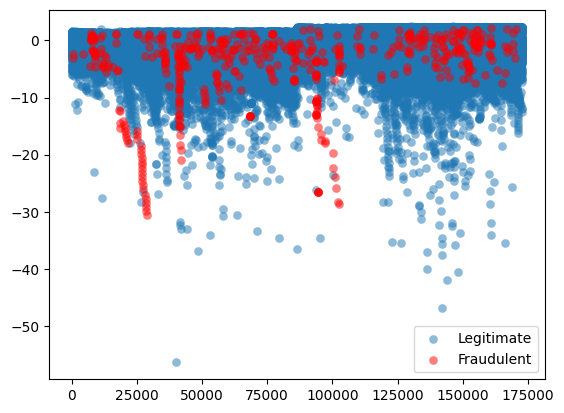

In [46]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Legitimate", alpha=0.5, linewidth=0.15,)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

def prep_data(df):
    # Split the data into features and labels
    X = df.drop(columns=['Class']).values
    y = df['Class'].values
    return X, y


X, y = prep_data(df)
plot_data(X, y)

**Figure 1:** Scatter plot of the Original Dataset


# Data Spliting

Following the EDA, the dataset is divided into training and test sets. This step ensures that the models can be trained on one subset of data while being evaluated on a separate, unseen subset. Given the imbalance in the dataset, where one class is significantly underrepresented, the training dataset is balanced using SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples of the minority class to address this imbalance (more explained later).


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
X_test.shape

(85443, 30)

In [49]:
X_train.shape

(199364, 30)

In [50]:
print(pd.value_counts(pd.Series(y_train)))

0    199019
1       345
Name: count, dtype: int64


In [51]:
print(pd.value_counts(pd.Series(y_test)))

0    85296
1      147
Name: count, dtype: int64


# SMOTE (Synthetic Minority Oversampling Technique)

SMOTE stands for Synthetic Minority Oversampling Technique. It is a method used to balance datasets
where one class (say fraudulent cases) is much smaller than the other classes (here, legitimate
transactions cases). It helps create more examples of the minority class by generating synthetic data points.

### Working Mechanisms:

**1.** Identify the Minority Class: Identify the underrepresented class in the dataset.

**2.** Synthetic Sample Generation: For each data point in the minority class, SMOTE generates
new, similar data points by mixing features of the existing points to create new ones.

**3.** Data Augmentation: The newly created points are added to the dataset, making the minority
class more balanced with the majority class.

### Advantages:

- Improves model performance by providing a more balanced dataset.
- Reduces overfitting as the synthetic samples are generated based on existing data points.

### Considerations:

- May increase computational complexity.
- Requires careful tuning of parameters like the number of neighbors to avoid generating noisy
  data.


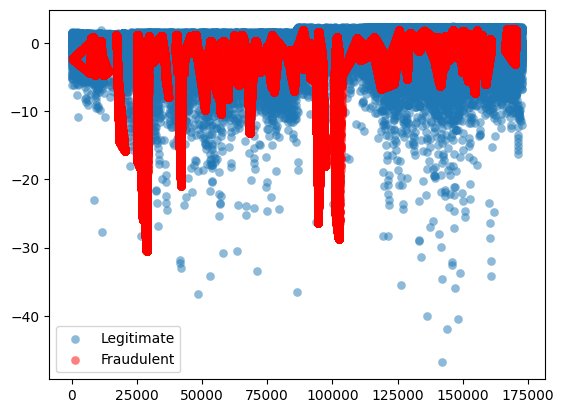

In [52]:
#Oversample the minority using SMOTE
method=SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
plot_data(X_resampled, y_resampled)

**Figure 2:** Implementation of SMOTE in an imbalanced dataset


In [53]:
X_test = df.drop(columns=['Class']).values
y_test = df['Class'].values

X_resampled_df = pd.DataFrame(X_resampled, columns=df.columns.drop('Class'))
y_resampled_df = pd.DataFrame(y_resampled, columns=['Class'])

In [54]:
print(pd.value_counts(pd.Series(y_resampled)))

0    199019
1    199019
Name: count, dtype: int64


In [55]:
df.shape

(284807, 31)

In [56]:
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Print the resampled DataFrame
print("Resampled DataFrame:")
df_resampled.head()

Resampled DataFrame:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113921.00000000000000000,-0.13206625955969101,0.10704355070308499,-0.65058817298528004,-0.99603226797581601,1.81433323189868001,1.74074026929169001,0.49685179480458003,0.63301590375369199,0.01718094327879720,...,-0.06248864713076400,0.00529241164028680,0.25151860625716399,-2.46681020740764989,-0.88969037341326396,0.33746247421711700,0.30639465733219201,0.07481696634050040,47.89000000000000057,0
1,135319.00000000000000000,2.12599440988093003,0.01420740554701070,-1.51476030793728000,0.11502080879019200,0.59851021928783399,-0.33323504892148598,0.19928927855189199,-0.26435319778232702,0.38411067230537999,...,-0.32936789583723303,-0.78815006974856705,0.26772994908170200,0.06612158511576870,-0.13578463547105399,0.20384112872263899,-0.06826737943486590,-0.05767758831964260,1.97999999999999998,0
2,125498.00000000000000000,-0.08669397004139950,0.16624022263171601,1.57312699970049996,0.68726578565938101,0.22235888363338699,1.10260588367202006,1.57509329400154008,-1.09860846099620990,0.76388654265200995,...,0.01532437859555830,1.06366314870865009,-0.41084082399577698,0.72272347514468605,-0.17173331224300800,-0.61354259866390504,-1.20157064595420993,-1.13993068336935011,170.09999999999999432,0
3,33520.00000000000000000,1.35233923289461999,-0.53498432179745103,0.55514265017087605,-0.62935514317490604,-1.14416971869082995,-0.85296713982027195,-0.64212845775575900,-0.03265896296456100,-0.65448207157456695,...,-0.01481422977565890,-0.18037854096168399,0.17811168774754499,0.34771981641746802,0.15180986796357199,-0.40436116266440902,0.01374605767124570,0.01615225235748240,5.95999999999999996,0
4,145152.00000000000000000,-1.52675980311880011,0.64778189280610299,0.61539121667366103,-0.56111396427582805,0.83694990082468601,-0.51425078091902099,0.98432487690588399,-0.09742972673638590,-0.06263449729200039,...,-0.22153298849368300,-0.39315828973919897,-0.21498978419877901,0.58844685679006903,0.67949615367925498,0.51843361767290497,0.06502178783682180,0.14729395314056501,89.95000000000000284,0


In [57]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398038 entries, 0 to 398037
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    398038 non-null  float64
 1   V1      398038 non-null  float64
 2   V2      398038 non-null  float64
 3   V3      398038 non-null  float64
 4   V4      398038 non-null  float64
 5   V5      398038 non-null  float64
 6   V6      398038 non-null  float64
 7   V7      398038 non-null  float64
 8   V8      398038 non-null  float64
 9   V9      398038 non-null  float64
 10  V10     398038 non-null  float64
 11  V11     398038 non-null  float64
 12  V12     398038 non-null  float64
 13  V13     398038 non-null  float64
 14  V14     398038 non-null  float64
 15  V15     398038 non-null  float64
 16  V16     398038 non-null  float64
 17  V17     398038 non-null  float64
 18  V18     398038 non-null  float64
 19  V19     398038 non-null  float64
 20  V20     398038 non-null  float64
 21  V21     39

In [58]:
print(X_resampled.shape)

(398038, 30)


In [59]:
print(y_resampled.shape)

(398038,)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

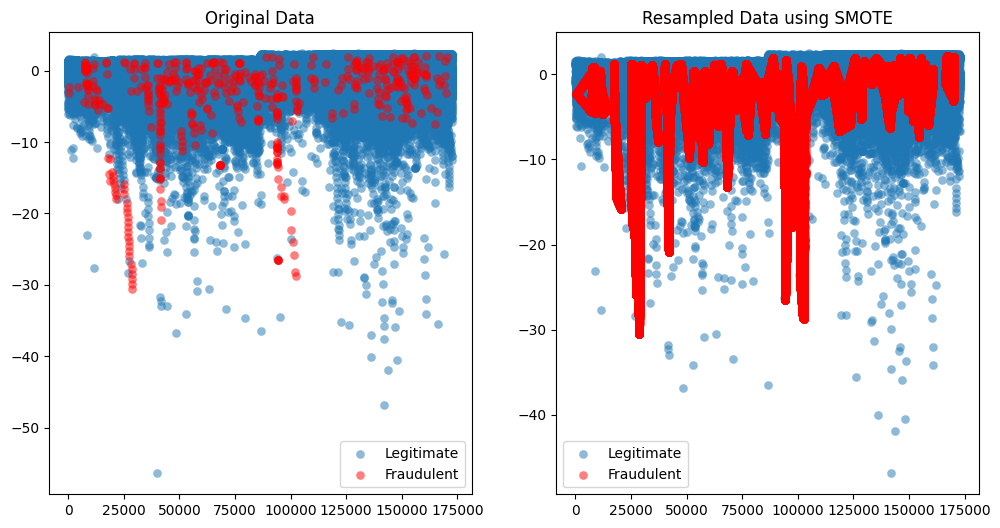

In [61]:
#Compare the original data with the resampled data

def compare_plot(X, y, X_resampled, y_resampled, method):
    #original Data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Legitimate", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Data')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Legitimate", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='r')
    plt.title(f'Resampled Data using {method}')
    plt.legend()

    plt.show()


# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE') 

**Figure 3:** Implementation of SMOTE in an imbalanced dataset

The above figure shows before and after of the dataset. The red dots in the figure represent the
fraudulent transaction dataset. The blue dots represent legitimate transaction. The original dataset has few red dots. This means that there are very few fraudulent transactions in comparison to the
legitimate transactions. This is an ideal dataset. But to train the model and let it not become biased towards legitimate transactions, SMOTE is performed such that the selected models train equally to give more accurate and balanced accuracy. After the data sets are balanced, it trains the dataset with the help of the selected models.


In [62]:
#Before Resampling
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [63]:
#After Resampling
# Print the value_counts on the resampled labels y_resampled
print(pd.value_counts(pd.Series(y_resampled)))

0    199019
1    199019
Name: count, dtype: int64


In [64]:
# Get the mean for each group to try and see if the resampling has changed the mean
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.20225805883819703,0.00825773748556370,-0.00627085741580706,0.01217091703184534,-0.00785986782046521,0.00545311588864745,0.00241874843610736,0.00963654992948408,-0.00098747115166529,0.00446656869133597,...,-0.00064428940688807,-0.00123484680552540,-0.00002431123934031,0.00006975192742793,0.00018192536544853,-0.00007172626324029,-0.00008937579014912,-0.00029517541383411,-0.00013094035488017,88.29102242231327580
1,80746.80691056911018677,-4.77194844147908181,3.62377810198228056,-7.03328104859655845,4.54202910442309271,-3.15122488593600458,-1.39773671059235149,-5.56873108374273951,0.57063589529623782,-2.58112292170299540,...,0.37231939577147166,0.71358835266870058,0.01404888214012134,-0.04030796594836945,-0.10513030543948290,0.04144888726282707,0.05164812556245366,0.17057479224418595,0.07566729064577460,122.21132113821138887


In [65]:
#Total number of transactions after resampling
print(X_resampled.shape)
print(y_resampled.shape)

(398038, 30)
(398038,)


In [66]:
#Class distribution for testing
class_distribution = Counter(y_test)
print(f" Class distribution in Testing: {class_distribution}")

 Class distribution in Testing: Counter({0: 284315, 1: 492})


In [67]:
#Class distribution for training
class_distribution = Counter(y_resampled)
print(f" Class distribution in Training: {class_distribution}")

 Class distribution in Training: Counter({0: 199019, 1: 199019})


In [68]:
y_train = y_resampled
X_train = X_resampled

In [69]:
#Class distribution for training
class_distribution = Counter(y_train)
print(f" Class distribution in Training: {class_distribution}")

 Class distribution in Training: Counter({0: 199019, 1: 199019})


### Model Training and Predicition

In this phase, the selected models—Decision Tree (DT), Logistic Regression (LR), and Random Forest
(RF)—are trained using the balanced training dataset prepared with SMOTE. Each model is fitted to
the training data to learn the underlying patterns associated with the target variable. Once trained, thes
models are evaluated on the imbalanced test dataset to assess their predictive performance. The aim s
to determine how effectively each model can identify fraudulent versus legitimate instances, therby
providing insights into their accuracy and robustness in practical applications.


#### Logistic Regression

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

#### Logistic Regression Equation

Logistic regression uses a logistic function called a sigmoid function to map predictions and their
probabilities. The sigmoid function refers to an S-shaped curve that converts any real value to a range between 0 and 1.

Moreover, the output of the sigmoid function (estimated probability) is compared to the threshold.
Threshold defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0. The threshold is by default 0.5. However, since this is not a strict case, the threshold can be adjusted based on specific requirements.

For example, if the output of the sigmoid function is above 0.5, the output is considered as 1. On the other hand, if the output is less than 0.5, the output is classified as 0. Also, if the graph goes further to the negative end, the predicted value of y will be 0 and vice versa. In other words, if the output of the sigmoid function is 0.85, it implies that there are 85% chances of the event occurring: a coin toss, for example. However, if the output is too close to the threshold (say 0.55), the evaluation can be done manually to verify whether the fraudulent detection has been correct or not.

The sigmoid function is referred to as activation function for logistic regression and is defined as: S(x) = 1/(1+e^(-x))


![](https://www.rinf.tech/wp-content/uploads/2022/11/MicrosoftTeams-image-183-1024x597.png)

**Figure 4:** Sigmoid Function

The above formula and figure represent sigmoid function, which transforms any input x into a value
between 0 and 1, making it useful for binary classification tasks. It calculates the probability of a given
input belonging to the positive class by mapping the linear combination of features to a rang
interpretable as probabilities.


In [70]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [71]:
predicted_lr = lr.predict(X_test)

In [72]:
#To compare with the actual values
print('Classification report:\n', classification_report(y_test, predicted_lr))
lr_accuracy = round(accuracy_score(y_test, predicted_lr) *100,2)
print('The accuracy of the Logistic Regression is: {}%' .format(lr_accuracy))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.10      0.89      0.18       492

    accuracy                           0.99    284807
   macro avg       0.55      0.94      0.59    284807
weighted avg       1.00      0.99      0.99    284807

The accuracy of the Logistic Regression is: 98.58%


Confusion matrix:
 [[280336   3979]
 [    52    440]]


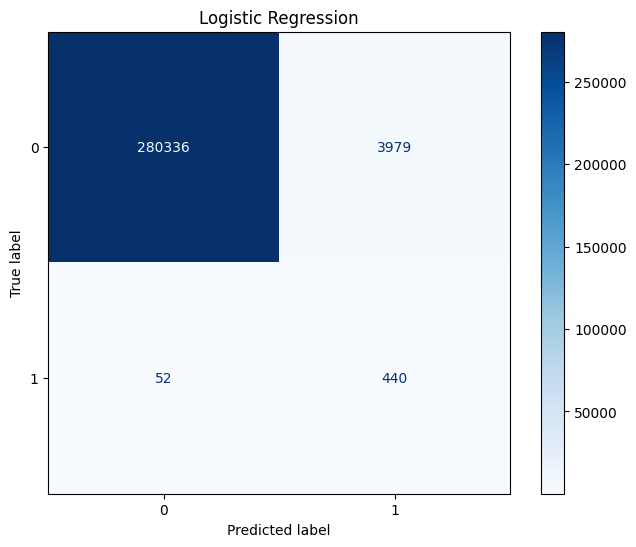

In [73]:
#For Comparison

fig,ax = plt.subplots(figsize=(8,6), dpi=100)
ax.set_title('Logistic Regression')
conf_mat = confusion_matrix(y_test, predicted_lr)
print('Confusion matrix:\n', conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=lr.classes_).plot(ax=ax, cmap='Blues')

**Figure 5:** Performance Result of Logistic Regression


**Random Forest**

Random Forest is a popular supervised machine learning algorithm. It can be used both for classification
and regression problems. It is based on the concept of ensemble learning. Ensemble learning is a process
of combining multiple classifiers to solve a complex problem and to improve the performance of th
mode.

Random Forest is a classification algorithm that utilizes multiple decision trees, each trained on diffrent
subsets of the dataset. The algorithm aggregates the predictions from these individual trees to hance
the overall predictive accuracy. Rather than depending on a single decision tree, the rando forest
combines the predictions from multiple trees and determines the outcome based on the majorty vote
from these prdictions.

Increasing the number of trees in the forest generally improves accuracy and reduces the risk of
overfitting.

The figure below explains the working of Random Forest algorithm: algorithm:


![Random Forest](https://framerusercontent.com/images/mWCWly6zyIdDKQJu3qL0VBQqKY.jpg)

**Figure 6:** Random Forest

The random forest, as described in the image above works as a model whole that has multiple decision
trees. It has the highest accuracy among the three models.


In [ ]:
Rf = RandomForestClassifier(random_state=0)
Rf.fit(X_train, y_train)

#If you have cuda install use this instead
# import tensorflow as tf

# Rf = RandomForestClassifier(random_state=0)
# with tf.device('/device:GPU:0'): 
#     Rf.fit(X_train, y_train)

In [75]:
predicted_rf = Rf.predict(X_test)

In [76]:
print("classification Report:\n", classification_report(y_test, predicted_rf))
rf_accuracy = round(accuracy_score(y_test, predicted_rf) *100,2)
print('The accuracy of the Random Forest is: {}%' .format(rf_accuracy))

classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.97      0.95      0.96       492

    accuracy                           1.00    284807
   macro avg       0.99      0.97      0.98    284807
weighted avg       1.00      1.00      1.00    284807

The accuracy of the Random Forest is: 99.99%


Confusion matrix:
 [[284301     14]
 [    26    466]]


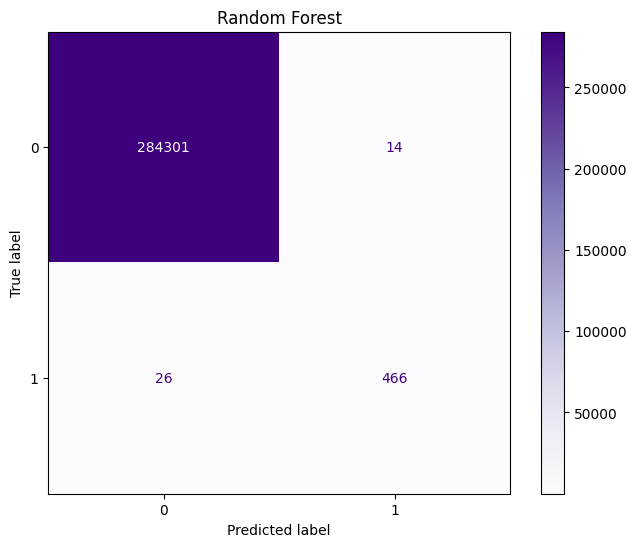

In [77]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

ax.set_title('Random Forest')
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_rf)
print('Confusion matrix:\n', conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=Rf.classes_).plot(ax= ax, cmap='Purples')

**Figure 7:** Performance Result of Random Forest


In [78]:
class_distribution = Counter(y_test)
print(f" Class distribution in y_test: {class_distribution}")

 Class distribution in y_test: Counter({0: 284315, 1: 492})


**Decision Tree**

Decision Tree is a supervised machine learning algorithm used for both classification and regression
tasks. It builds a tree structure by recursively splitting the dataset into subsets based on the most
significant features that differentiate the target class.

In a Decision tree, there are two nodes, which are Decision node and leaf node. Decision nodes are usd
to make any decision and have multiple branches, whereas leaf nodes are the output of those decisins
and do not contain any further branches. The decision tree performs based on the features given inthe
dataset. In simple words, a decision tree asks a yes/no question, and based on the answer it splits futher
into subtrees.


![Decision Tree](https://framerusercontent.com/images/mWCWly6zyIdDKQJu3qL0VBQqKY.jpg)

**Figure 8:** Decision Tree

**Example:** Suppose you want to decide if you should bring an umbrella.

- **Start at the Top:** Ask, "Is it raining?"
  - **Yes:** Follow the branch to the next question.
  - **No:** Go directly to the decision "Don’t bring an umbrella."
- **Next Question:** If it’s raining, ask, "Is there a chance of rain later?"
  - **Yes:** Follow this branch to the final decision "Bring an umbrella."
  - **No:** End at the decision "Don’t bring an umbrella."

Each question helps narrow down the options until you reach a clear decision.
ision.


In [79]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
class_distribution = Counter(y_train)
print(f" Class distribution in y_test: {class_distribution}")

 Class distribution in y_test: Counter({0: 199019, 1: 199019})


In [81]:
predicted_dt = dt.predict(X_test)

In [82]:
print("classification Report:\n", classification_report(y_test, predicted_dt))
dt_accuracy = round(accuracy_score(y_test, predicted_dt) *100,2)
print('The accuracy of the Decision Tree is: {}%' .format(dt_accuracy))

classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.75      0.93      0.83       492

    accuracy                           1.00    284807
   macro avg       0.88      0.96      0.92    284807
weighted avg       1.00      1.00      1.00    284807

The accuracy of the Decision Tree is: 99.93%


In [83]:
print('Confusion matrix:\n', confusion_matrix(y_true=y_test, y_pred=predicted_dt))

Confusion matrix:
 [[284164    151]
 [    35    457]]


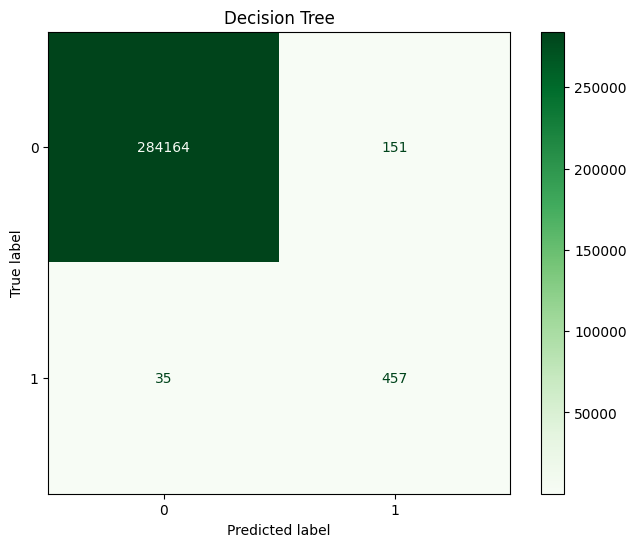

In [84]:
fig,ax = plt.subplots(figsize=(8,6), dpi=100)

ax.set(title="Decision Tree")
conf_mat = confusion_matrix(y_test, predicted_dt)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=dt.classes_).plot(ax=ax, cmap='Greens')

**Figure 9:** Performance Result of Decision Tree


### Evaluation Metrics

- **Performance Evaluation:** Assess the model's performance using metrics like precision, recall,
  F1 score and accuracy. Specifically, assess how accurately the model detects each type of fraud
  and its overall reliabilit

![Evaluation Metrics](https://www.researchgate.net/profile/Sunanda-Biswas-3/publication/371828574/figure/tbl3/AS:11431281170407510@1687756638695/Most-Common-Machine-Learning-Evaluation-Metrics.png)

**Table 1:** Evaluation Metrics.


In [85]:
accuracy_lr = accuracy_score(y_test, predicted_lr)*100
accuracy_dt = accuracy_score(y_test, predicted_dt)*100
accuracy_rf = accuracy_score(y_test, predicted_rf)*100

precision_score_lr = precision_score(y_test, predicted_lr)*100
precision_score_dt = precision_score(y_test, predicted_dt)*100
precision_score_rf = precision_score(y_test, predicted_rf) *100

recall_dt = recall_score(y_test, predicted_dt)*100
recall_lr = recall_score(y_test, predicted_lr)*100
recall_rf = recall_score(y_test, predicted_rf)*100


**Visualization:** The accuracies of the selected models is shown below.


In [86]:

performance_df = pd.DataFrame({
    'models' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'accuracy' : [accuracy_lr, accuracy_dt, accuracy_rf],
    'precision' : [precision_score_lr, precision_score_dt, precision_score_rf],
    'recall' : [ recall_lr, recall_dt, recall_rf]
})

performance_df

,models,accuracy,precision,recall
0,Logistic Regression,98.58465557377451205,9.95700384702421282,89.43089430894308123
1,Decision Tree,99.93469261640338175,75.16447368421053454,92.88617886178862193
2,Random Forest,99.98595540137706905,97.08333333333332860,94.71544715447154772


### Conclusion

Using Random Forest for fraud detection demonstrates its ability to accurately identify and localize
fraudulent activities, which is crucial for maintaining the integrity of financial systems. Integrating this
model can streamline fraud detection processay, enhance the security of online transactions
and improve the efficiency of fraud management. While initial results are promising, ongo g
improvements through model refinement, incorporating additional data, and integration with bac nd
systems will further enhance the effectiveness of fraud detection.
